In [1]:
from dataset import FruitDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import visualizer
from utils import target_tensor_to_boxes, x1y1wh2xyxy
import torch
import cv2
from anchors import generate_anchors
from yolo import YOLOv2

torch.autograd.set_detect_anomaly(True)

In [2]:
cls_names = ['apple', 'banana', 'orange']
desired_height = desired_width = 416
grid_size = 13

train_data = FruitDataset(data_file='./fruit_dataset/train', cls_names=cls_names,
                          desired_height=desired_height, desired_width=desired_width)
test_data = FruitDataset(data_file='./fruit_dataset/test', cls_names=cls_names,
                         desired_height=desired_height, desired_width=desired_width)

def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = DataLoader(train_data, batch_size=5, shuffle=True,
                          num_workers=0, drop_last=True,
                          collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=5, shuffle=True,
                          num_workers=0, drop_last=True,
                          collate_fn=collate_fn)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [3]:
imgs, target_tensors = next(iter(train_loader))

In [4]:
boxes, obj_probs, cls_probs = target_tensor_to_boxes(target_tensors[0])

In [5]:
labels = [cls_names[idx] for idx in cls_probs.argmax(dim=1)]

In [6]:
boxes = x1y1wh2xyxy(boxes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


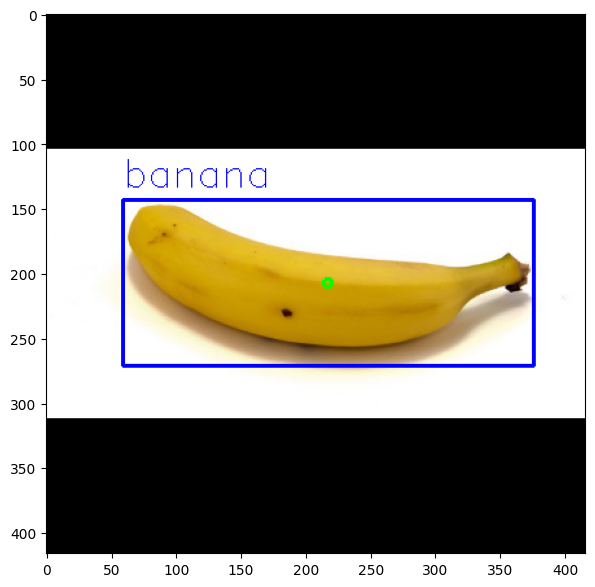

In [7]:
img = imgs[0].permute(1, 2, 0).numpy().copy()
img_with_box = visualizer.visualize_bbox(img, boxes, labels)
visualizer.plot_img(img_with_box)

In [3]:
size = (32, 64, 152)
aspect_ratios = (.5, 1.0, 2.0)
num_anchor_boxes = len(size) * len(aspect_ratios)

anchor_boxes = generate_anchors(size, aspect_ratios)

In [4]:
my_yolov2 = YOLOv2(S=grid_size, num_anchor_boxes=num_anchor_boxes,
                   num_classes=len(cls_names))
my_yolov2(torch.stack(imgs)).shape

NameError: name 'grid_size' is not defined

In [6]:
anchor_boxes 

tensor([[ 1.0800,  1.1900],
        [ 3.4200,  4.4100],
        [ 6.6300, 11.3800],
        [ 9.4200,  5.1100],
        [16.6200, 10.5200]])

In [216]:
from loss import yolo_loss

In [217]:
import unittest
import torch

class TestYoloLoss(unittest.TestCase):

    def test_yolo_loss(self):
        # Test case 1: Sample input tensors
        pred_tensor = torch.rand(2, 3, 4, 5)
        gt_tensor = torch.rand(2, 3, 4, 5)
        anchor_boxes = torch.rand(4, 2)

        # Ensure the function does not raise any exceptions
        yolo_loss_value = yolo_loss(pred_tensor, gt_tensor, anchor_boxes)
        
        # Test case 2: Edge case with zero tensors
        pred_tensor_zero = torch.zeros(2, 3, 4, 5)
        gt_tensor_zero = torch.zeros(2, 3, 4, 5)
        anchor_boxes_zero = torch.zeros(4, 2)

        yolo_loss_value_zero = yolo_loss(pred_tensor_zero, gt_tensor_zero, anchor_boxes_zero)

        # Assert statements for your specific requirements
        self.assertIsInstance(yolo_loss_value, torch.Tensor)
        self.assertIsInstance(yolo_loss_value_zero, torch.Tensor)
        self.assertEqual(yolo_loss_value.shape, ())
        self.assertEqual(yolo_loss_value_zero.shape, ())

In [219]:
test_yolo_loss = TestYoloLoss()
test_yolo_loss.test_yolo_loss()